### Grupo: NameError

# completar integrantes

## 75.06/95.58 Organización de Datos - 1er cuatrimestre 2020

### TP 1: análisis exploratorio de datos

Enunciado completo: https://docs.google.com/document/d/1dv1VoTD5g1HlDLeVmfgp4fTP7fenykT-EnKnuWBCvFs/edit?usp=sharing

Se pide:

*El objetivo del primer TP es realizar un análisis exploratorio del set de datos. Queremos ver qué
cosas podemos descubrir sobre los datos que puedan resultar interesantes. Estas cosas
pueden estar relacionadas al objetivo del TP2 (predecir si un cierto tweet es real o no) o no,
ambas son de interés.*
___

# Inicialización

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data_folder = './kaggle_data/'
data_file = 'train.csv'

tweets = pd.read_csv(data_folder + data_file, dtype={'target':'bool'})

tweets.tail()

,id,keyword,location,text,target
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,True
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,True
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,True
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,True
7612,10873,NaN,NaN,The Latest: More Homes Razed by Northern Calif...,True


In [3]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
id          7613 non-null int64
keyword     7552 non-null object
location    5080 non-null object
text        7613 non-null object
target      7613 non-null bool
dtypes: bool(1), int64(1), object(3)
memory usage: 245.4+ KB


**Observación:** No hay valores nulos en id, text o target.

In [4]:
tweets['target'].value_counts()

False    4342
True     3271
Name: target, dtype: int64

**Observación:** Hay buena cantidad y balance de ambos valores de target, por lo que no sería un problema el tamaño de las muestras (De Moivre).

# Análisis de longitud de tweets según target

In [5]:
# Obtenemos medidas de longitudes
tweets['length'] = tweets['text'].str.len()

In [6]:
# Separamos tweets sobre desastres reales vs. los que no
tweets_truedisaster = tweets.loc[tweets['target'] == True,:]
tweets_notadisaster = tweets.loc[tweets['target'] == False,:]

In [7]:
#este código siguiente es para ver los describe() uno al lado del otro para facilitar la comparación.
tweets_stats = pd.DataFrame({ \
                     'tweets_total': tweets['length'].describe(), \
                     'tweets_truedisaster': tweets_truedisaster['length'].describe(), \
                     'tweets_notadisaster': tweets_notadisaster['length'].describe() })

tweets_stats=tweets_stats.round(decimals=1)

tweets_stats

,tweets_total,tweets_truedisaster,tweets_notadisaster
count,7613.0,3271.0,4342.0
mean,101.0,108.1,95.7
std,33.8,29.3,35.9
min,7.0,14.0,7.0
25%,78.0,88.0,68.0
50%,107.0,115.0,101.0
75%,133.0,136.0,130.0
max,157.0,151.0,157.0


**Observación:** Según vemos en estos cálculos, aquellos tweets sobre desastres tienden a ser un poco más largos.

### A continuación van varios gráficos sobre la distribución de los tweets según su longitud y si son desastres verdaderos o no.

El gráfico que me parece que ilustra mejor la distribución es el tercero, el **violinplot**.

Text(0.5, 0, 'Tweet length')

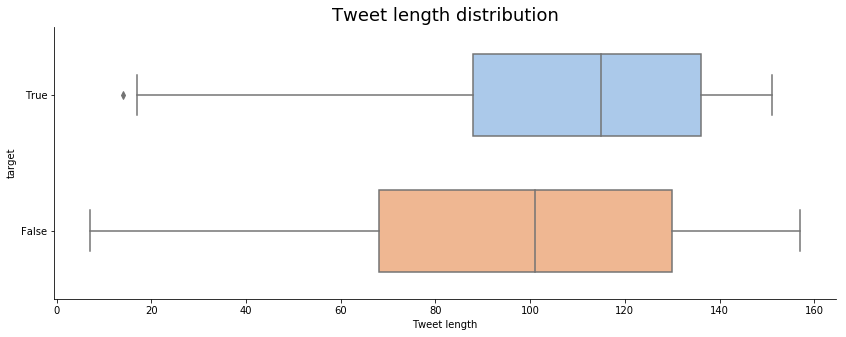

In [8]:
plt.figure(figsize=(14, 5))

ax = sns.boxplot(x=tweets['length'], y=tweets['target'], order=[True, False], orient="h", width=0.6, palette="pastel")

sns.despine()
plt.title('Tweet length distribution', fontsize=18)
plt.xlabel('Tweet length')

---
*Las siguientes visualizaciones son otros intentos de graficar el punto 1. De todas maneras creo que el BoxPlot es el que más ejemplifica la observación.*

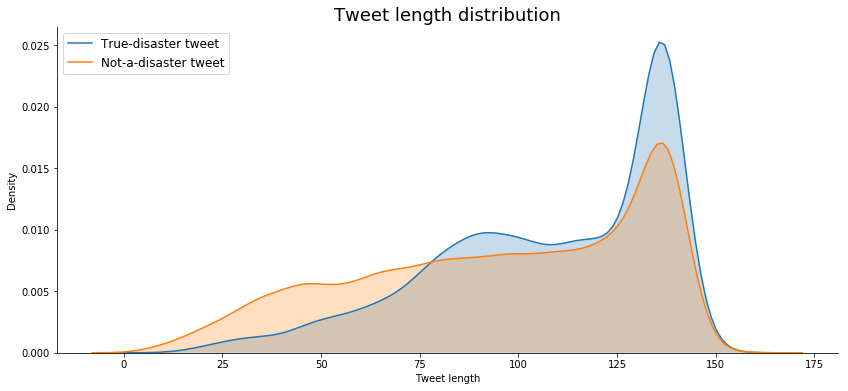

In [9]:
plt.figure(figsize=(14, 6))

# Default bandwith
#sns.kdeplot(tweets_truedisaster['length'], label='True disaster tweet', shade= True)
#sns.kdeplot(tweets_notadisaster['length'], label='Not-a-disaster tweet', shade= True)

# 'Custom' bandwith
plot_bandwith = 5
sns.kdeplot(tweets_truedisaster['length'], bw=plot_bandwith, label='True-disaster tweet', shade= True)
sns.kdeplot(tweets_notadisaster['length'], bw=plot_bandwith, label='Not-a-disaster tweet', shade= True)
    
# Plot formatting
sns.despine()
plt.title('Tweet length distribution', fontsize=18)
plt.xlabel('Tweet length')
plt.ylabel('Density')
plt.legend(fontsize=12, loc='upper left')

___
Esta visualización todavía necesita trabajo... No puedo juntar ambas mitades.


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


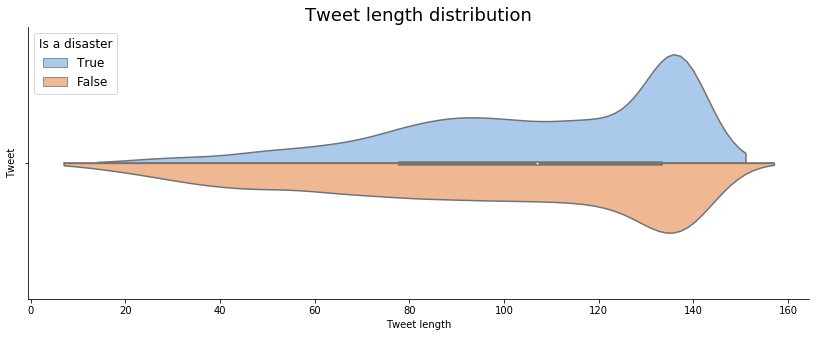

In [10]:
plt.figure(figsize=(14, 5))

ax = sns.violinplot(data=tweets, x='length', y=['Is a disaster']*len(tweets), hue='target',
                    orient="h", split=True, cut=0, legend='Full', hue_order=[True,False], palette='pastel')

sns.despine()
plt.title('Tweet length distribution', fontsize=18)
plt.xlabel('Tweet length')
ax.set(yticklabels=[])
plt.ylabel('Tweet')
plt.legend(title='Is a disaster', title_fontsize=12, fontsize=12, loc='upper left')


___
# Distribución de target teniendo en cuenta valor de location

## location not-null vs location null

In [11]:
# Cuantos tweets no tienen location?
pd.isnull(tweets['location']).value_counts()

False    5080
True     2533
Name: location, dtype: int64

In [12]:
tweets_targetcount = tweets['target'].value_counts()
tweets_withlocation_targetcount = tweets.loc[~pd.isnull(tweets['location']),:]['target'].value_counts()
tweets_withoutlocation_targetcount = tweets.loc[pd.isnull(tweets['location']),:]['target'].value_counts()

Text(0.7, 1, 'n=2533')

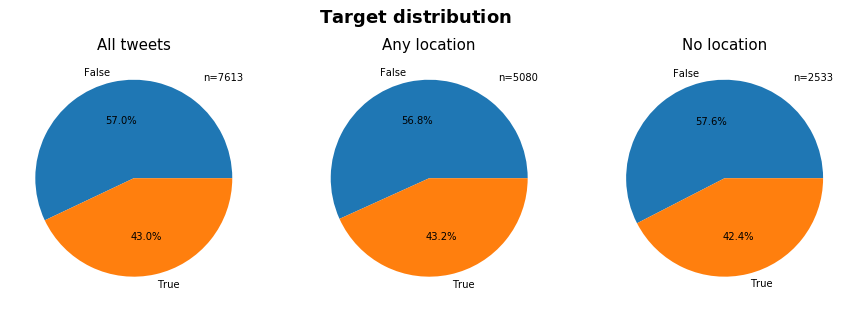

In [13]:
plt.figure(figsize=(15,5))

plt.suptitle(r'$\bf{Target\ distribution}$', fontsize=18) # Mathmode para darle bold

plt.subplot(1, 3, 1)
plt.pie(tweets_targetcount, labels= tweets_targetcount.index, autopct='%1.1f%%')
plt.title('All tweets', fontsize=15)
#cantidad de muestras
plt.text(.7, 1, 'n=' + str(tweets_targetcount.sum()))

plt.subplot(1, 3, 2)
plt.pie(tweets_withlocation_targetcount, labels= tweets_withlocation_targetcount.index, autopct='%1.1f%%')
plt.title('Any location', fontsize=15)
plt.text(.7, 1, 'n=' + str(tweets_withlocation_targetcount.sum()))

plt.subplot(1, 3, 3)
plt.pie(tweets_withoutlocation_targetcount, labels= tweets_withoutlocation_targetcount.index, autopct='%1.1f%%')
plt.title('No location', fontsize=15)
plt.text(.7, 1, 'n=' + str(tweets_withoutlocation_targetcount.sum()))

**Tener o no tener location no afecta el porcentaje de target**

In [14]:
tweets['location'].value_counts()

USA                             104
New York                         71
United States                    50
London                           45
Canada                           29
Nigeria                          28
UK                               27
Los Angeles, CA                  26
India                            24
Mumbai                           22
Washington, DC                   21
Kenya                            20
Worldwide                        19
Australia                        18
Chicago, IL                      18
California                       17
California, USA                  15
Everywhere                       15
New York, NY                     15
Florida                          14
United Kingdom                   14
San Francisco                    14
Washington, D.C.                 13
Los Angeles                      13
Indonesia                        13
NYC                              12
Toronto                          12
Ireland                     

___
# Distribución de target teniendo en cuenta valor de keyword

In [15]:
# Cuantos tweets no tienen keyword?
pd.isnull(tweets['keyword']).value_counts()

False    7552
True       61
Name: keyword, dtype: int64

**Casi todos los tweets tienen keywords**